# Importing Needed Libraries

In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [410]:
# Read csv files
train = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/train.csv")
test = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/test.csv")
stores = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/stores.csv")
transactions = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/transactions.csv")
holidays = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv")
oil_price = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/oil.csv")

In [411]:
import warnings
warnings.filterwarnings("ignore")

# **Train DataSet**

id: Unique identifier for each record.  
date: The date when the sales were recorded.  
store_nbr: Store number where the sales occurred.  
family: Product category or type.  
sales: Total sales revenue (in money) for that date, store, and product family.  
onpromotion: Number of items that were on promotion that day.  

In [412]:
train.columns.tolist()

['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion']

In [413]:
train.shape

(3000888, 6)

In [414]:
train.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [415]:
train.tail(10)

,id,date,store_nbr,family,sales,onpromotion
3000878,3000878,2017-08-15,9,MAGAZINES,11.000,0
3000879,3000879,2017-08-15,9,MEATS,449.228,0
3000880,3000880,2017-08-15,9,PERSONAL CARE,522.000,11
3000881,3000881,2017-08-15,9,PET SUPPLIES,6.000,0
3000882,3000882,2017-08-15,9,PLAYERS AND ELECTRONICS,6.000,0
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [416]:
train.sample(15)

,id,date,store_nbr,family,sales,onpromotion
474617,474617,2013-09-24,26,FROZEN FOODS,25.700,0
2873732,2873732,2017-06-05,40,PET SUPPLIES,6.000,0
2088758,2088758,2016-03-21,16,MAGAZINES,1.000,0
1452090,1452090,2015-03-28,51,MEATS,583.794,0
662689,662689,2014-01-08,52,HOME AND KITCHEN II,0.000,0
409716,409716,2013-08-18,54,LINGERIE,1.000,0
576935,576935,2013-11-20,46,PREPARED FOODS,74.420,0
2057000,2057000,2016-03-03,25,FROZEN FOODS,125.000,0
2842254,2842254,2017-05-18,8,PRODUCE,3386.650,9
1906711,1906711,2015-12-08,9,BOOKS,0.000,0


# Descriptive Statistics for Numeric Columns:

In [417]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3000888.0,1.500444e+06,866281.891642,0.0,750221.75,1500443.5,2.250665e+06,3000887.0
store_nbr,3000888.0,2.750000e+01,15.585787,1.0,14.00,27.5,4.100000e+01,54.0
sales,3000888.0,3.577757e+02,1101.997721,0.0,0.00,11.0,1.958473e+02,124717.0
onpromotion,3000888.0,2.602770e+00,12.218882,0.0,0.00,0.0,0.000000e+00,741.0


The dataset has about 3 million records from 54 stores.
Average sales per record are around $358, but most are small (median = $11), showing large variation.
Promotions are rare (median = 0), though some days have many (up to 741).
Overall, sales and promotions show high variability across stores and days.

# Information about Data

In [418]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


# Checking for Duplicates

In [419]:
train.duplicated().sum()

0

# Checking for Missing Values

In [420]:
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

no null values

In [421]:
train.nunique()

id             3000888
date              1684
store_nbr           54
family              33
sales           379610
onpromotion        362
dtype: int64

### dataset contains 54 stores and 33 type of products


In [422]:
print(train['family'].unique())

['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']


# Cleaning Text Columns

In [423]:
train['family']=train['family'].str.strip().str.title()

In [424]:
train['date'] = pd.to_datetime(train['date'], format='mixed')

In [425]:
print(train['date'].min(), train['date'].max())

2013-01-01 00:00:00 2017-08-15 00:00:00


In [426]:
train['sales'].describe()

count    3.000888e+06
mean     3.577757e+02
std      1.101998e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.958473e+02
max      1.247170e+05
Name: sales, dtype: float64

In [427]:
train.sort_values(by='sales', ascending=False).head(10)

,id,date,store_nbr,family,sales,onpromotion
2163723,2163723,2016-05-02,2,Grocery I,124717.000,59
2445984,2445984,2016-10-07,39,Meats,89576.360,0
2144154,2144154,2016-04-21,20,Grocery I,87438.516,53
2139699,2139699,2016-04-18,45,Grocery I,76090.000,38
2153031,2153031,2016-04-26,2,Grocery I,63434.000,30
2145045,2145045,2016-04-21,45,Grocery I,53874.000,44
562596,562596,2013-11-12,44,Grocery I,46271.000,0
1257246,1257246,2014-12-08,35,Grocery I,45361.000,3
1916586,1916586,2015-12-14,35,Grocery I,40351.460,7
2760297,2760297,2017-04-02,9,Grocery I,38422.625,73


In [428]:
print("\nCounts per family:\n", train['family'].value_counts())


Counts per family:
 family
Automotive                    90936
Home Appliances               90936
School And Office Supplies    90936
Produce                       90936
Prepared Foods                90936
Poultry                       90936
Players And Electronics       90936
Pet Supplies                  90936
Personal Care                 90936
Meats                         90936
Magazines                     90936
Liquor,Wine,Beer              90936
Lingerie                      90936
Lawn And Garden               90936
Ladieswear                    90936
Home Care                     90936
Home And Kitchen Ii           90936
Baby Care                     90936
Home And Kitchen I            90936
Hardware                      90936
Grocery Ii                    90936
Grocery I                     90936
Frozen Foods                  90936
Eggs                          90936
Deli                          90936
Dairy                         90936
Cleaning                      90936


# **Test DataSet**

## DataSet Columns

In [429]:
test.columns.tolist()

['id', 'date', 'store_nbr', 'family', 'onpromotion']

In [430]:
test.shape

(28512, 5)

In [431]:
test.head(10)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
5,3000893,2017-08-16,1,BREAD/BAKERY,12
6,3000894,2017-08-16,1,CELEBRATION,0
7,3000895,2017-08-16,1,CLEANING,25
8,3000896,2017-08-16,1,DAIRY,45
9,3000897,2017-08-16,1,DELI,18


In [432]:
test.tail(10)

,id,date,store_nbr,family,onpromotion
28502,3029390,2017-08-31,9,MAGAZINES,0
28503,3029391,2017-08-31,9,MEATS,20
28504,3029392,2017-08-31,9,PERSONAL CARE,14
28505,3029393,2017-08-31,9,PET SUPPLIES,0
28506,3029394,2017-08-31,9,PLAYERS AND ELECTRONICS,0
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9
28511,3029399,2017-08-31,9,SEAFOOD,0


In [433]:
test.sample(15)

,id,date,store_nbr,family,onpromotion
23524,3024412,2017-08-29,19,POULTRY,0
2768,3003656,2017-08-17,36,PREPARED FOODS,0
28447,3029335,2017-08-31,8,BABY CARE,0
1263,3002151,2017-08-16,44,DELI,18
17638,3018526,2017-08-25,53,HOME AND KITCHEN II,2
9358,3010246,2017-08-21,21,LADIESWEAR,0
11484,3012372,2017-08-22,31,AUTOMOTIVE,0
2131,3003019,2017-08-17,19,LADIESWEAR,0
2973,3003861,2017-08-17,42,BEVERAGES,1
26639,3027527,2017-08-30,7,DAIRY,19


# Information about Data

In [434]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


# Descriptive Statistics for Numeric Columns

In [435]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,28512.0,3.015144e+06,8230.849774,3000888.0,3008015.75,3015143.5,3022271.25,3029399.0
store_nbr,28512.0,2.750000e+01,15.586057,1.0,14.00,27.5,41.00,54.0
onpromotion,28512.0,6.965383e+00,20.683952,0.0,0.00,0.0,6.00,646.0


# Checking for Duplicates

In [436]:
test.duplicated().sum()

0

# Checking for Missing Values

In [437]:
test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

There are no null values in this data

In [438]:
test.nunique()

id             28512
date              16
store_nbr         54
family            33
onpromotion      212
dtype: int64

In [439]:
test['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

# Cleaning Text Columns

In [440]:
test['family']=test['family'].str.strip().str.title()

# Date Column Transformation

In [441]:
print(test['date'].min(), test['date'].max())

2017-08-16 2017-08-31


In [442]:
test.sample(10)

,id,date,store_nbr,family,onpromotion
22124,3023012,2017-08-28,3,Hardware,0
8680,3009568,2017-08-20,52,Baby Care,0
4254,3005142,2017-08-18,28,Produce,0
18523,3019411,2017-08-26,29,Eggs,1
22957,3023845,2017-08-28,52,"Liquor,Wine,Beer",4
26328,3027216,2017-08-30,47,Players And Electronics,0
27527,3028415,2017-08-31,31,Bread/Bakery,3
21381,3022269,2017-08-27,9,Produce,2
27145,3028033,2017-08-31,20,Ladieswear,0
511,3001399,2017-08-16,23,Home And Kitchen Ii,6


In [443]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,28512.0,3.015144e+06,8230.849774,3000888.0,3008015.75,3015143.5,3022271.25,3029399.0
store_nbr,28512.0,2.750000e+01,15.586057,1.0,14.00,27.5,41.00,54.0
onpromotion,28512.0,6.965383e+00,20.683952,0.0,0.00,0.0,6.00,646.0


# **Holidays Events DataSet**

date: The date of the holiday.

type: The type of the holiday (e.g., Holiday, Transfer, Additional, Bridge, Work Day).

locale: The scope of the holiday (National, Regional, or Local).

locale_name: The specific region or city where the holiday applies.

description: The name or description of the holiday
transferred: Indicates whether the holiday was moved to another date (True or False).

In [444]:
holidays.columns.tolist()

['date', 'type', 'locale', 'locale_name', 'description', 'transferred']

In [445]:
holidays.shape

(350, 6)

In [446]:
holidays.head(10)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [447]:
holidays.tail(10)

,date,type,locale,locale_name,description,transferred
340,2017-12-06,Holiday,Local,Quito,Fundacion de Quito,True
341,2017-12-08,Holiday,Local,Loja,Fundacion de Loja,False
342,2017-12-08,Transfer,Local,Quito,Traslado Fundacion de Quito,False
343,2017-12-21,Additional,National,Ecuador,Navidad-4,False
344,2017-12-22,Holiday,Local,Salinas,Cantonizacion de Salinas,False
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


In [448]:
holidays.sample(15)

,date,type,locale,locale_name,description,transferred
13,2012-08-05,Holiday,Local,Esmeraldas,Fundacion de Esmeraldas,False
316,2017-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
318,2017-07-03,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False
340,2017-12-06,Holiday,Local,Quito,Fundacion de Quito,True
138,2014-11-03,Holiday,National,Ecuador,Independencia de Cuenca,False
301,2017-03-02,Holiday,Local,Manta,Fundacion de Manta,False
109,2014-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
202,2015-12-08,Holiday,Local,Loja,Fundacion de Loja,False
66,2013-08-05,Holiday,Local,Esmeraldas,Fundacion de Esmeraldas,False


# Showing Information about DataSet

In [449]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


# Descriptive Statistics for Columns

In [450]:
holidays.describe().T

,count,unique,top,freq
date,350,312,2014-06-25,4
type,350,6,Holiday,221
locale,350,3,National,174
locale_name,350,24,Ecuador,174
description,350,103,Carnaval,10
transferred,350,2,False,338


# Checking for Duplicates

In [451]:
holidays.duplicated().sum()

0

# Checking for Missing Values

In [452]:
holidays.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

There are no null values in this data

In [453]:
holidays.nunique()

date           312
type             6
locale           3
locale_name     24
description    103
transferred      2
dtype: int64

# Showing Unique Values for Some Columns

In [454]:
holidays['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

Holiday – Official national holiday.

Transfer – A holiday that was moved to another date.

Additional – An extra, non-regular holiday.

Bridge – A “bridge day” between two holidays (e.g., making Friday off when Thursday and Saturday are holidays).

Work Day – A day that would normally be a holiday but was converted into a working day.

Event – A special event that doesn’t necessarily imply a holiday.

In [455]:
holidays['locale'].unique()

array(['Local', 'Regional', 'National'], dtype=object)

In [456]:
holidays['locale_name'].unique()

array(['Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo',
       'Guaranda', 'Imbabura', 'Latacunga', 'Machala', 'Santo Domingo',
       'El Carmen', 'Cayambe', 'Esmeraldas', 'Ecuador', 'Ambato',
       'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
       'Santa Elena', 'Quito', 'Loja', 'Salinas', 'Guayaquil'],
      dtype=object)

In [457]:
holidays['description'].unique()

array(['Fundacion de Manta', 'Provincializacion de Cotopaxi',
       'Fundacion de Cuenca', 'Cantonizacion de Libertad',
       'Cantonizacion de Riobamba', 'Cantonizacion del Puyo',
       'Cantonizacion de Guaranda', 'Provincializacion de Imbabura',
       'Cantonizacion de Latacunga', 'Fundacion de Machala',
       'Fundacion de Santo Domingo', 'Cantonizacion de El Carmen',
       'Cantonizacion de Cayambe', 'Fundacion de Esmeraldas',
       'Primer Grito de Independencia', 'Fundacion de Riobamba',
       'Fundacion de Ambato', 'Fundacion de Ibarra',
       'Cantonizacion de Quevedo', 'Independencia de Guayaquil',
       'Traslado Independencia de Guayaquil', 'Dia de Difuntos',
       'Independencia de Cuenca', 'Provincializacion de Santo Domingo',
       'Provincializacion Santa Elena', 'Independencia de Guaranda',
       'Independencia de Latacunga', 'Independencia de Ambato',
       'Fundacion de Quito-1', 'Fundacion de Quito', 'Fundacion de Loja',
       'Navidad-4', 'Cantonizac

In [458]:
holidays = holidays[holidays['transferred'] == False] # Filter out transferred holidays (redundant)
holidays = holidays.replace(to_replace=['Transfer', 'Bridge', 'Additional'], value='Holiday') # Rename 'Transfer/Bridge/Additional' to 'Holiday'
holidays['Holiday_Gen'] = holidays['type']=='Holiday'
holidays['Event_Gen'] = holidays['type']=='Event'
holidays['Work_Day_Gen'] = holidays['type']=='Work Day'
holidays.drop(columns=["type", "transferred"], inplace=True)

In [459]:
holidays.columns

Index(['date', 'locale', 'locale_name', 'description', 'Holiday_Gen',
       'Event_Gen', 'Work_Day_Gen'],
      dtype='object')

# Clean Text Columns

In [460]:
holidays['description']=holidays['description'].str.strip().str.title()

In [461]:
holidays['locale_name']=holidays['locale_name'].str.strip().str.title()

In [462]:
holidays['locale']=holidays['locale'].str.strip().str.title()

In [463]:
holidays.sample(10)

,date,locale,locale_name,description,Holiday_Gen,Event_Gen,Work_Day_Gen
110,2014-06-25,Local,Latacunga,Cantonizacion De Latacunga,True,False,False
88,2013-12-24,National,Ecuador,Navidad-1,True,False,False
146,2014-12-05,Local,Quito,Fundacion De Quito-1,True,False,False
228,2016-04-24,National,Ecuador,Terremoto Manabi+8,False,True,False
305,2017-04-14,Local,Libertad,Cantonizacion De Libertad,True,False,False
253,2016-05-15,National,Ecuador,Terremoto Manabi+29,False,True,False
279,2016-11-07,Regional,Santa Elena,Provincializacion Santa Elena,True,False,False
49,2013-04-14,Local,Libertad,Cantonizacion De Libertad,True,False,False
104,2014-05-12,Local,Puyo,Cantonizacion Del Puyo,True,False,False
178,2015-06-25,Local,Latacunga,Cantonizacion De Latacunga,True,False,False


# Date Range

In [464]:
print(f"Date range: {holidays['date'].min()} to {holidays['date'].max()}")

Date range: 2012-03-02 to 2017-12-26


# **Oil DataSet**

date – The date of each record.

dcoilwtico – The daily price of WTI crude oil in USD.

In [465]:
oil_price.columns.tolist()

['date', 'dcoilwtico']

In [466]:
oil_price.shape

(1218, 2)

In [467]:
oil_price.head(10)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


In [468]:
oil_price.sample(15)

,date,dcoilwtico
150,2013-07-30,103.14
552,2015-02-12,51.17
475,2014-10-28,81.36
709,2015-09-21,46.67
963,2016-09-09,45.88
740,2015-11-03,47.88
276,2014-01-22,96.35
252,2013-12-19,98.40
942,2016-08-11,43.51
1125,2017-04-25,49.22


In [469]:
oil_price.tail(10)

,date,dcoilwtico
1208,2017-08-18,48.59
1209,2017-08-21,47.39
1210,2017-08-22,47.65
1211,2017-08-23,48.45
1212,2017-08-24,47.24
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96
1217,2017-08-31,47.26


# Descriptive Statistics

In [470]:
oil_price.describe().T

,count,mean,std,min,25%,50%,75%,max
dcoilwtico,1175.0,67.714366,25.630476,26.19,46.405,53.19,95.66,110.62


Count: 1175 — number of available oil price records.

Mean: 67.71 — the average daily oil price (in USD).

Std: 25.63 — standard deviation, showing high variability in prices.

Min: 26.19 — the lowest recorded oil price.

25%: 46.41 — 25% of the prices are below this value.

50% (Median): 53.19 — the middle value of the dataset.

75%: 95.66 — 75% of the prices are below this value.

Max: 110.62 — the highest recorded oil price.

# Information about Data

In [471]:
oil_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


# Checking for duplicates

In [472]:
oil_price.duplicated().sum()

0

# Checking for null values

In [473]:
oil_price.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [474]:
oil_price.loc[0, "dcoilwtico"] = oil_price.loc[1, "dcoilwtico"]
oil_price.ffill(inplace=True)
oil_price.bfill(inplace=True)

In [475]:
oil_price.isna().sum()

date          0
dcoilwtico    0
dtype: int64

In [476]:
oil_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1218 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [477]:
oil_price.describe().T

,count,mean,std,min,25%,50%,75%,max
dcoilwtico,1218.0,67.692159,25.629744,26.19,46.4225,53.2,95.685,110.62


# Checking for Zeros or Negative Values

In [478]:
print(f"Negative values: {(oil_price['dcoilwtico'] < 0).sum()}")
print(f"Zero values: {(oil_price['dcoilwtico'] == 0).sum()}")

if (oil_price['dcoilwtico'] <= 0).any():
    print(oil_price[oil_price['dcoilwtico'] <= 0])

Negative values: 0
Zero values: 0


# Statistics:

In [479]:
print("Oil Price Statistics :")
print(f"\nMin price: ${oil_price['dcoilwtico'].min():.2f}")
print(f"Max price: ${oil_price['dcoilwtico'].max():.2f}")
print(f"Mean price: ${oil_price['dcoilwtico'].mean():.2f}")
print(f"Median price: ${oil_price['dcoilwtico'].median():.2f}")

Oil Price Statistics :

Min price: $26.19
Max price: $110.62
Mean price: $67.69
Median price: $53.20


# Oil Price BoxPlot

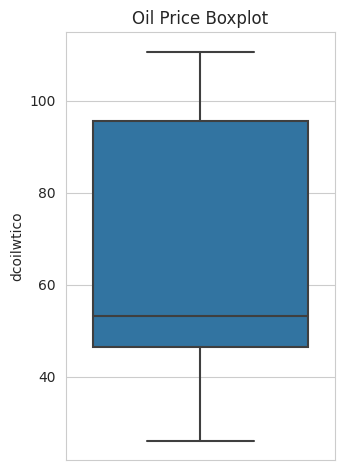

In [480]:
plt.subplot(1, 2, 2)
sns.boxplot(y=oil_price['dcoilwtico'])
plt.title('Oil Price Boxplot')
plt.ylabel('dcoilwtico')
plt.tight_layout()
plt.show()

The boxplot shows that the values are normally distributed with no significant outliers, and most prices range between 40 and 95 USD, indicating normal market fluctuations during this period.

Overall, the general trend of oil prices is downward over time.

In [481]:
oil_price['date'] = pd.to_datetime(oil_price['date'])

start_date = oil_price['date'].min()
end_date = oil_price['date'].max()

print(f"Start Date: {start_date}")
print(f"End Date:   {end_date}")


Start Date: 2013-01-01 00:00:00
End Date:   2017-08-31 00:00:00


# **Stores DataSet**

store_nbr: Unique ID for each store.


city: City where the store is located.


state: State or region of the store.


type: Store category (e.g., A, B, C) based on size or characteristics.


cluster: Group number indicating stores with similar sales patterns.



In [482]:
stores.columns.tolist()

['store_nbr', 'city', 'state', 'type', 'cluster']

In [483]:
stores.shape

(54, 5)

In [484]:
stores.head(10)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [485]:
stores.sample(15)

,store_nbr,city,state,type,cluster
36,37,Cuenca,Azuay,D,2
38,39,Cuenca,Azuay,B,6
32,33,Quevedo,Los Rios,C,3
14,15,Ibarra,Imbabura,C,15
47,48,Quito,Pichincha,A,14
52,53,Manta,Manabi,D,13
20,21,Santo Domingo,Santo Domingo de los Tsachilas,B,6
1,2,Quito,Pichincha,D,13
42,43,Esmeraldas,Esmeraldas,E,10
51,52,Manta,Manabi,A,11


In [486]:
stores['city'] = stores['city'].str.strip().str.title()
stores['state'] = stores['state'].str.strip().str.title()
stores['type'] = stores['type'].str.strip().str.upper()

# Descriptive Statistics

In [487]:
stores.describe().T

,count,mean,std,min,25%,50%,75%,max
store_nbr,54.0,27.500000,15.732133,1.0,14.25,27.5,40.75,54.0
cluster,54.0,8.481481,4.693395,1.0,4.00,8.5,13.00,17.0


# Information about Stores DataSet

In [488]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [489]:
stores.duplicated().sum()

0

In [490]:
stores.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [491]:
stores.nunique()

store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64

In [492]:
print("Unique Cities :")
print("Count:", stores['city'].nunique())
print(stores['city'].unique())
print("\n")

Unique Cities :
Count: 22
['Quito' 'Santo Domingo' 'Cayambe' 'Latacunga' 'Riobamba' 'Ibarra'
 'Guaranda' 'Puyo' 'Ambato' 'Guayaquil' 'Salinas' 'Daule' 'Babahoyo'
 'Quevedo' 'Playas' 'Libertad' 'Cuenca' 'Loja' 'Machala' 'Esmeraldas'
 'Manta' 'El Carmen']




In [493]:
print(" Unique States :")
print("Count:", stores['state'].nunique())
print(stores['state'].unique())
print("\n")

 Unique States :
Count: 16
['Pichincha' 'Santo Domingo De Los Tsachilas' 'Cotopaxi' 'Chimborazo'
 'Imbabura' 'Bolivar' 'Pastaza' 'Tungurahua' 'Guayas' 'Santa Elena'
 'Los Rios' 'Azuay' 'Loja' 'El Oro' 'Esmeraldas' 'Manabi']




Type A: Large stores with high sales.

Type B: Medium-sized stores.

Type C: Small or local stores.

Type D / E: Very small or specialized stores.

In [494]:
print(" Unique Store Types :")
print("Count:", stores['type'].nunique())
print(stores['type'].unique())

 Unique Store Types :
Count: 5
['D' 'B' 'C' 'E' 'A']


# Distribution of Stores Types

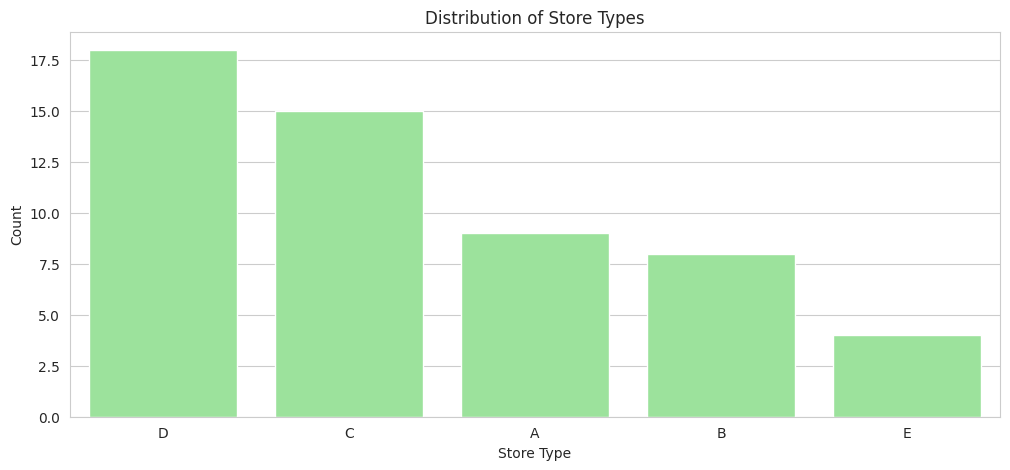

In [570]:
plt.figure(figsize=(12, 5))
sns.countplot(
    x='type', 
    data=stores, 
    order=stores['type'].value_counts().index,
    color='lightgreen'
)
plt.title('Distribution of Store Types')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()


# Number of Stores per State

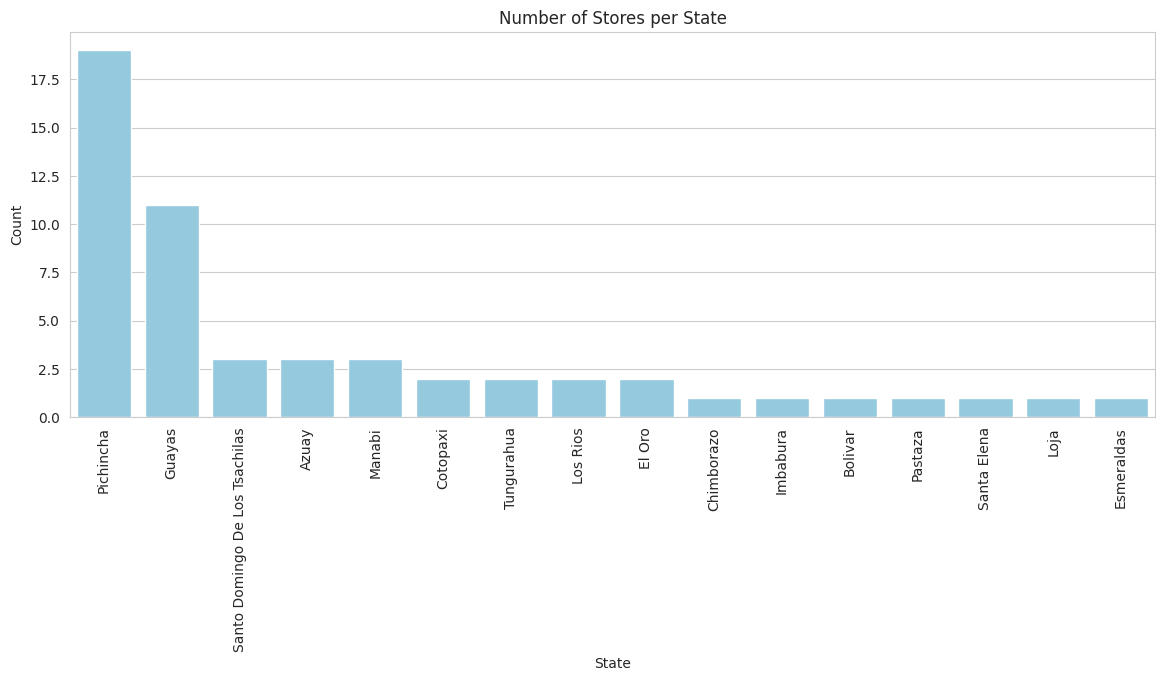

In [569]:
plt.figure(figsize=(14, 5))
sns.countplot(
    x='state', 
    data=stores, 
    order=stores['state'].value_counts().index,
    color='skyblue'
)
plt.title('Number of Stores per State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


# ***Transactions DataSet***

date – The date when transactions were recorded.

store_nbr – Unique identifier of the store where the transactions occurred.

transactions – The total number of sales transactions made in that store on that specific date.

In [497]:
transactions.columns.tolist()

['date', 'store_nbr', 'transactions']

In [498]:
transactions.shape

(83488, 3)

In [499]:
transactions.head(10)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
5,2013-01-02,5,1903
6,2013-01-02,6,2143
7,2013-01-02,7,1874
8,2013-01-02,8,3250
9,2013-01-02,9,2940


In [500]:
transactions.sample(15)

,date,store_nbr,transactions
73621,2017-02-13,4,1482
23488,2014-05-22,45,2963
30825,2014-10-24,49,2589
50477,2015-11-24,47,3329
44034,2015-07-24,18,1067
25013,2014-06-24,23,1032
33973,2014-12-30,27,1814
36050,2015-02-12,40,1311
51747,2015-12-18,45,4577
5072,2013-04-22,12,1168


# Descriptive Statistics

In [501]:
transactions.describe().T

,count,mean,std,min,25%,50%,75%,max
store_nbr,83488.0,26.939237,15.608204,1.0,13.0,27.0,40.0,54.0
transactions,83488.0,1694.602158,963.286644,5.0,1046.0,1393.0,2079.0,8359.0


# Information about Data

In [502]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


# Checking for Duplicates

In [503]:
transactions.duplicated().sum()

0

## Checking for Null Values

In [504]:
transactions.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

no null values in this dataset

In [505]:
transactions.describe().T

,count,mean,std,min,25%,50%,75%,max
store_nbr,83488.0,26.939237,15.608204,1.0,13.0,27.0,40.0,54.0
transactions,83488.0,1694.602158,963.286644,5.0,1046.0,1393.0,2079.0,8359.0


In [506]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [507]:
transactions.sample(10)

,date,store_nbr,transactions
30583,2014-10-19,47,4783
21064,2014-03-31,24,2359
52813,2016-01-12,1,1744
14397,2013-11-07,32,609
10817,2013-08-23,23,1136
17269,2014-01-09,36,861
10568,2013-08-18,6,1972
78238,2017-05-10,43,1265
63390,2016-07-29,33,791
38726,2015-04-08,8,2795


# Transactions over Time

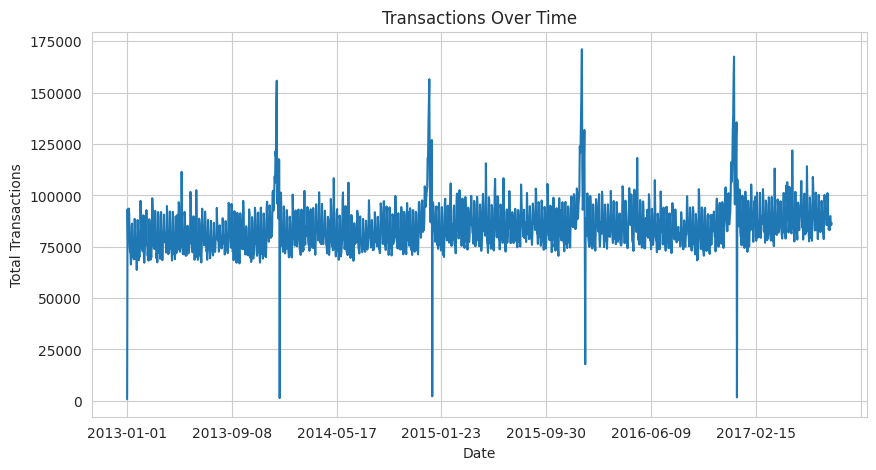

In [508]:
transactions.groupby('date')['transactions'].sum().plot(figsize=(10,5))
plt.title("Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Total Transactions")
plt.show()

# Monthly Transaction by Year

# Top 10 Stores by Total Transactions

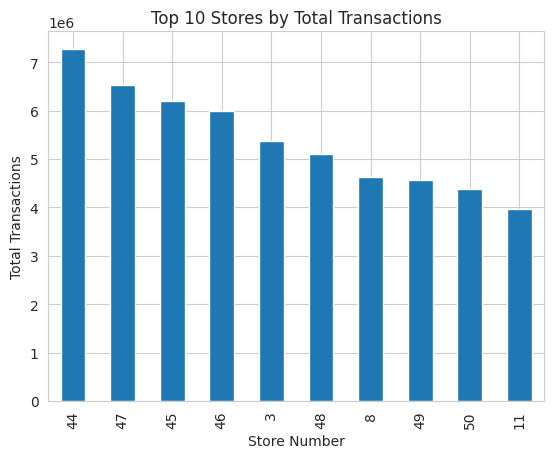

In [509]:
top_stores =transactions.groupby('store_nbr')['transactions'].sum().sort_values(ascending=False).head(10)
top_stores.plot(kind='bar')
plt.title("Top 10 Stores by Total Transactions")
plt.xlabel("Store Number")
plt.ylabel("Total Transactions")
plt.show()

In [510]:
transactions['date'] = pd.to_datetime(transactions['date'])

start_date = transactions['date'].min()
end_date = transactions['date'].max()

print(f" Data covers the period from {start_date.date()} to {end_date.date()}")

 Data covers the period from 2013-01-01 to 2017-08-15


# **Merging DataSets**

In [511]:
print(train.columns.tolist())
print(test.columns.tolist())
print(stores.columns.tolist())
print(oil_price.columns.tolist())
print(holidays.columns.tolist())
print(transactions.columns.tolist())

['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion']
['id', 'date', 'store_nbr', 'family', 'onpromotion']
['store_nbr', 'city', 'state', 'type', 'cluster']
['date', 'dcoilwtico']
['date', 'locale', 'locale_name', 'description', 'Holiday_Gen', 'Event_Gen', 'Work_Day_Gen']
['date', 'store_nbr', 'transactions']


In [512]:
print(f"   - Train: {train.shape}")
print(f"   - Test: {test.shape}")
print(f"   - Stores: {stores.shape}")
print(f"   - Oil: {oil_price.shape}")
print(f"   - Holidays: {holidays.shape}")
print(f"   - Transactions: {transactions.shape}")

   - Train: (3000888, 6)
   - Test: (28512, 5)
   - Stores: (54, 5)
   - Oil: (1218, 2)
   - Holidays: (338, 7)
   - Transactions: (83488, 3)


In [513]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
holidays['date'] = pd.to_datetime(holidays['date'])
oil_price['date'] = pd.to_datetime(oil_price['date'])
transactions['date'] = pd.to_datetime(transactions['date'])

In [514]:
# Initiating scaling instances
scalers = {'scaler_onpromotion' : MinMaxScaler(), 'scaler_day' : MinMaxScaler(), 'scaler_month' : MinMaxScaler(),
           'scaler_year' : MinMaxScaler(), 'scaler_dcoilwtico' : MinMaxScaler(), 'scaler_DoW' : MinMaxScaler()}

In [515]:
def process_data(data, stores, transactions, holidays, oil_price, fit_scaler, scalers):
    # Merge stores into data to substitute store ids with location data
    data = data.merge(stores, how='left', left_on='store_nbr', right_on='store_nbr')

    # Merge holidays into data to extend location names with location related holidays
    data = data.merge(holidays, how='left', left_on='date', right_on='date')
    data['Holiday'] = ((data['Holiday_Gen'] == True)
                       & ((data['city'] == data['locale_name'])
                          | (data['state'] == data['locale_name'])
                          | ('Ecuador' == data['locale_name']))).astype(dtype='float64')
    data['Event'] = ((data['Event_Gen'] == True)
                       & ((data['city'] == data['locale_name'])
                          | (data['state'] == data['locale_name'])
                          | ('Ecuador' == data['locale_name']))).astype(dtype='float64')
    data['Work_Day'] = ((data['Work_Day_Gen'] == True)
                        & ((data['city'] == data['locale_name'])
                           | (data['state'] == data['locale_name'])
                           | ('Ecuador' == data['locale_name']))).astype(dtype='float64')

    # Merge oil prices into data and interpolate missing values
    data = data.merge(oil_price, how='left', left_on='date', right_on='date')
    data.sort_values('id', inplace=True)
    data['dcoilwtico'] = data['dcoilwtico'].ffill()

    # Merge transactions into data
    data = data.merge(transactions, how='left', left_on=['date', 'store_nbr'], right_on=['date', 'store_nbr'])

    # Including day of week and pay day information
    data['date'] = pd.to_datetime(data['date'])
    data['day'] = data['date'].dt.day
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data['day_of_week'] = data['date'].dt.day_name()
    data['DoW'] = data['date'].dt.dayofweek
    data['Pay_Day'] = ((data['date'].dt.day == 1) | (data['date'].dt.day == 16)).astype(dtype='float64')
    data['Earthquake'] = (data['date'] == '2016-04-16').astype(dtype='float64')

    # Fill NaN values with proper substitute values
    data.fillna({'Holiday_Gen': False, 'Event_Gen': False, 'Work_Day_Gen': False, 'Holiday': 0.0, 'Event': 0.0,
                 'Work_Day': 0.0, 'Pay_Day': 0.0, 'Earthquake': 0.0, 'transactions': 0.0}, inplace=True)

    # One Hot Encoding of state related features
    encoder = OneHotEncoder()
    One_Hot_Coding = pd.DataFrame(encoder.fit_transform(data[['store_nbr', 'family', 'day_of_week']]).toarray(),
                                  columns=encoder.get_feature_names_out()) #.astype(dtype=np.int32) 'city', 'type', 'cluster',

    # Scaling numeric values
    if fit_scaler:
        scalers['scaler_dcoilwtico'].fit(oil_price[['dcoilwtico']])
        for col in ['onpromotion', 'day', 'month', 'year', 'DoW']:
            scalers[f'scaler_{col}'].fit(data[[col]])
    data[['dcoilwtico']] = scalers['scaler_dcoilwtico'].transform(data[['dcoilwtico']])
    for col in ['onpromotion', 'day', 'month', 'year', 'DoW']:
        data[[col]] = scalers[f'scaler_{col}'].transform(data[[col]])

    # Constructing feature vectors and labels vector
    features = data[['onpromotion', 'dcoilwtico', 'Holiday', 'Event', 'Work_Day', 'Earthquake', 'day', 'month', 'year']]
    features = features.merge(One_Hot_Coding, how='left', left_index=True, right_index=True)

    if 'sales' in data.columns:
        labels = data[['sales']]
    else: labels = []
    return features, labels, scalers, data

trainvaltes_feat, trainvaltes_label, scalers, datat = process_data(train, stores, transactions, holidays, oil_price, True, scalers)
test_feat, test_label, _, data = process_data(test, stores, transactions, holidays, oil_price, False, scalers)

In [516]:
data.columns

Index(['id', 'date', 'store_nbr', 'family', 'onpromotion', 'city', 'state',
       'type', 'cluster', 'locale', 'locale_name', 'description',
       'Holiday_Gen', 'Event_Gen', 'Work_Day_Gen', 'Holiday', 'Event',
       'Work_Day', 'dcoilwtico', 'transactions', 'day', 'month', 'year',
       'day_of_week', 'DoW', 'Pay_Day', 'Earthquake'],
      dtype='object')

In [517]:
train['date'] = pd.to_datetime(train['date'])
min_date = train['date'].min()
max_date = train['date'].max()
print("Date range:", min_date, "to", max_date)

Date range: 2013-01-01 00:00:00 to 2017-08-15 00:00:00


In [518]:
trainvaltes_feat.head()

,onpromotion,dcoilwtico,Holiday,Event,Work_Day,Earthquake,day,month,year,store_nbr_1,...,family_Produce,family_School And Office Supplies,family_Seafood,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0.0,0.792965,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.792965,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.792965,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.792965,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.792965,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [519]:
trainvaltes_feat.sample(5)

,onpromotion,dcoilwtico,Holiday,Event,Work_Day,Earthquake,day,month,year,store_nbr_1,...,family_Produce,family_School And Office Supplies,family_Seafood,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
1757254,0.0,0.238185,0.0,0.0,0.0,0.0,0.033333,0.727273,0.50,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2121802,0.0,0.141537,0.0,0.0,0.0,0.0,0.766667,0.181818,0.75,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2557414,0.0,0.202535,0.0,0.0,0.0,0.0,0.433333,0.909091,0.75,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
871942,0.0,0.870544,1.0,0.0,0.0,0.0,0.000000,0.363636,0.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1573477,0.0,0.387185,1.0,0.0,0.0,0.0,0.766667,0.363636,0.50,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [520]:
trainvaltes_feat.columns

Index(['onpromotion', 'dcoilwtico', 'Holiday', 'Event', 'Work_Day',
       'Earthquake', 'day', 'month', 'year', 'store_nbr_1',
       ...
       'family_Produce', 'family_School And Office Supplies', 'family_Seafood',
       'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday'],
      dtype='object', length=103)

In [521]:
trainvaltes_feat.shape

(3054348, 103)

In [522]:
trainvaltes_feat.isna().sum()

onpromotion              0
dcoilwtico               0
Holiday                  0
Event                    0
Work_Day                 0
                        ..
day_of_week_Saturday     0
day_of_week_Sunday       0
day_of_week_Thursday     0
day_of_week_Tuesday      0
day_of_week_Wednesday    0
Length: 103, dtype: int64

In [523]:
trainvaltes_feat.duplicated().sum()

30756

In [524]:
trainvaltes_feat.drop_duplicates(inplace=True)

In [525]:
trainvaltes_label = trainvaltes_label.reset_index(drop=True)

In [526]:
trainvaltes_feat.duplicated().sum()

0

In [527]:
eda_train= pd.concat([trainvaltes_feat, trainvaltes_label], axis=1)
threshold_high = eda_train['sales'].quantile(0.99)
outliers = eda_train[eda_train['sales'] > threshold_high].sort_values('sales', ascending=False)

In [528]:
eda_train = pd.concat([trainvaltes_feat, trainvaltes_label, datat['date']], axis=1)

Q1 = eda_train['sales'].quantile(0.25)
Q3 = eda_train['sales'].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = eda_train['sales'] > (Q3 + 1.5*IQR)
outliers = eda_train[outlier_mask]

important_cols = ['date', 'sales', 'onpromotion', 'Holiday', 'Event', 'Earthquake', 'Work_Day']

outlier_summary = outliers[important_cols].sort_values(by='sales', ascending=False)
outlier_summary.reset_index(drop=True, inplace=True)
outlier_summary


,date,sales,onpromotion,Holiday,Event,Earthquake,Work_Day
0,2016-05-02,124717.000,0.079622,0.0,1.0,0.0,0.0
1,2016-10-07,89576.360,0.000000,0.0,0.0,0.0,0.0
2,2016-04-21,87438.516,0.071525,0.0,1.0,0.0,0.0
3,2016-04-21,87438.516,0.071525,0.0,0.0,0.0,0.0
4,2016-04-18,76090.000,0.051282,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
455501,2014-01-23,490.054,0.000000,0.0,0.0,0.0,0.0
455502,2015-04-12,490.052,0.000000,0.0,0.0,0.0,0.0
455503,2016-03-18,490.044,0.002699,0.0,0.0,0.0,0.0
455504,2015-12-04,490.038,0.006748,0.0,0.0,0.0,0.0


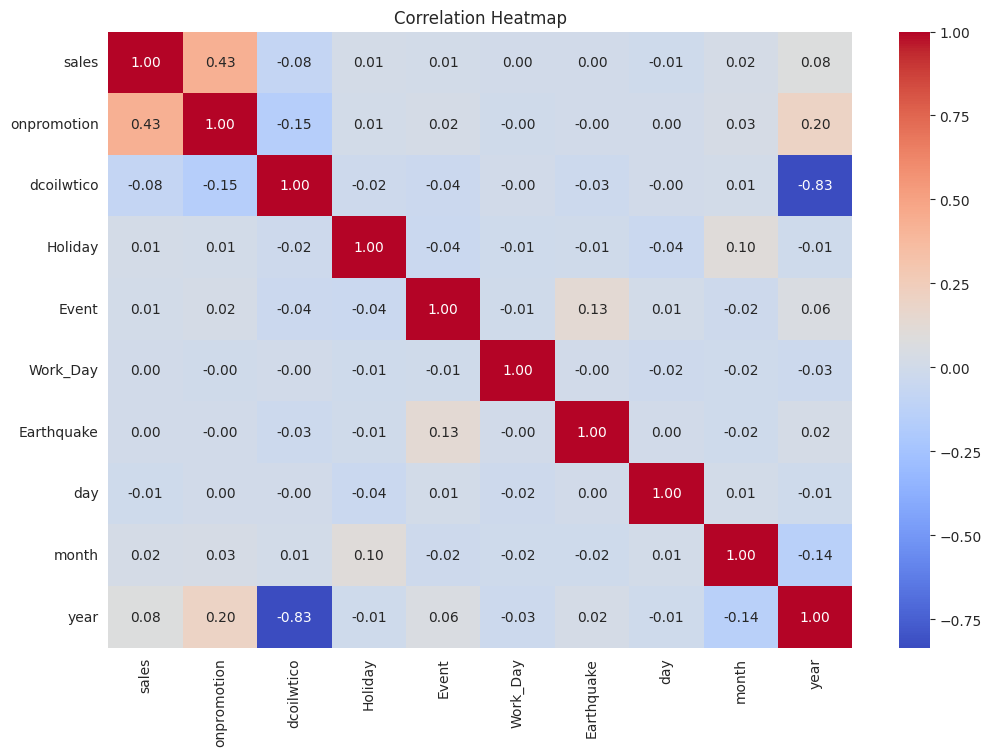

In [547]:
numeric_cols = [
    'sales',
    'onpromotion',
    'dcoilwtico',
    'Holiday',
    'Event',
    'Work_Day',
    'Earthquake',
    'day',
    'month',
    'year'
]

plt.figure(figsize=(12,8))
sns.heatmap(eda_train[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

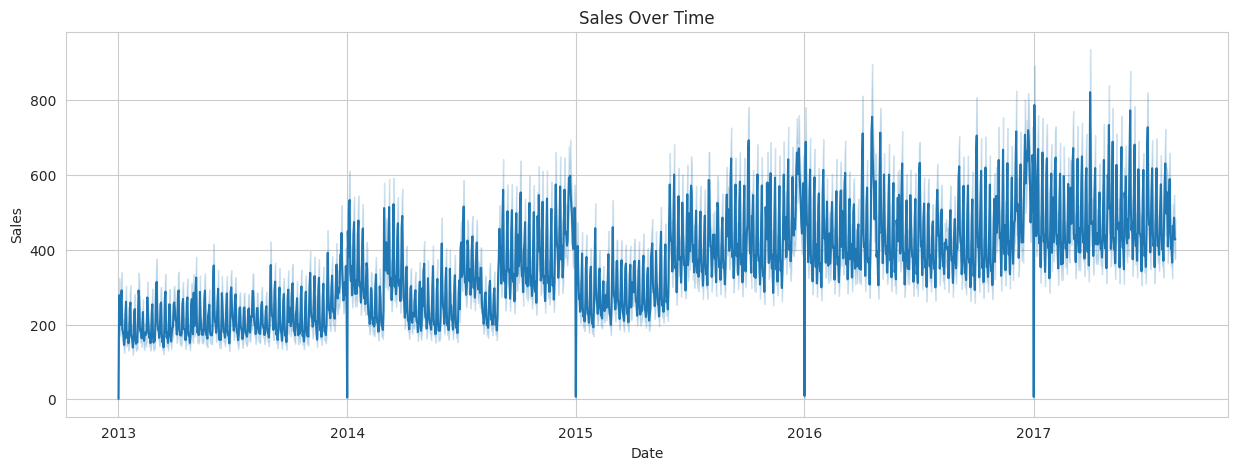

In [548]:
plt.figure(figsize=(15,5))
sns.lineplot(data=eda_train, x='date', y='sales')
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

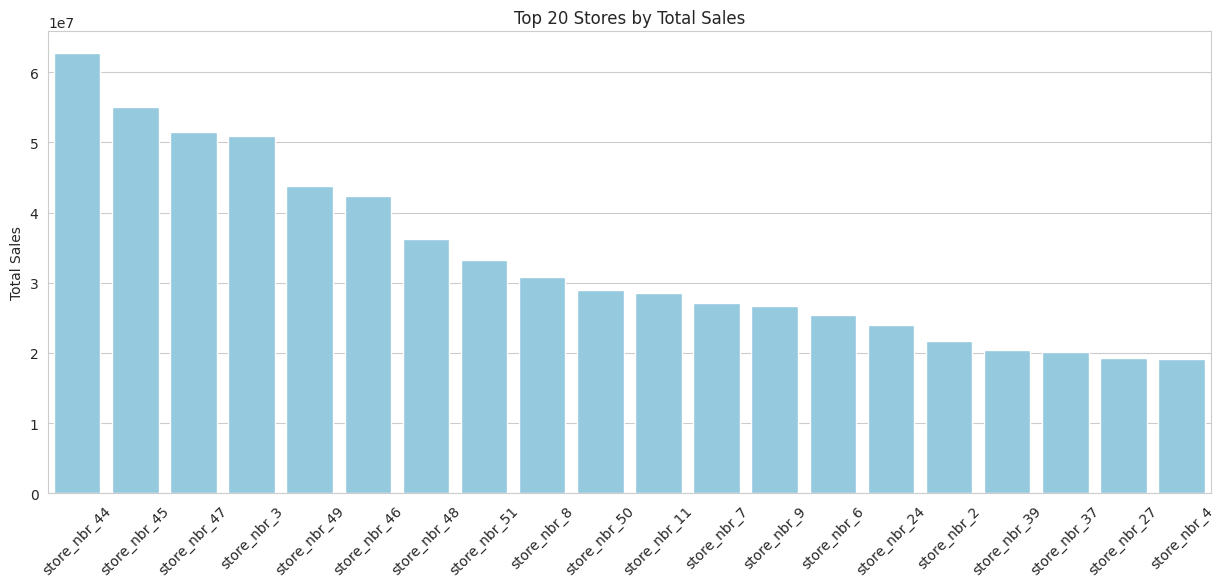

In [557]:
store_cols = [c for c in eda_train.columns if c.startswith('store_nbr_')]
store_sales = eda_train[store_cols].multiply(eda_train['sales'], axis=0).sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(15,6))
sns.barplot(x=store_sales.index, y=store_sales.values, color="skyblue")
plt.xticks(rotation=45)
plt.title("Top 20 Stores by Total Sales")
plt.ylabel("Total Sales")
plt.show()


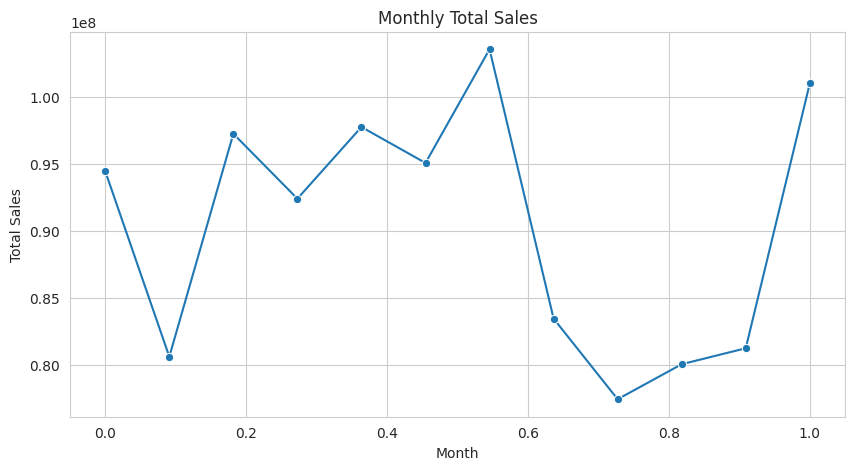

In [565]:
monthly_sales = eda_train.groupby('month')['sales'].sum()
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Monthly Total Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()